In [16]:
import requests
import pandas as pd
import matplotlib
import seaborn
import wordcloud
import textblob

print(f"requests version: {requests.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {seaborn.__version__}")
print(f"wordcloud version: {wordcloud.__version__}")
print(f"textblob version: {textblob.__version__}")

requests version: 2.31.0
pandas version: 1.5.3
matplotlib version: 3.7.1
seaborn version: 0.12.2
wordcloud version: 1.9.3
textblob version: 0.17.1


In [20]:
#replace with your info
id='user id'
sec="secret"
un='user name'
pw="password"

In [ ]:
# we use this function to convert responses to dataframes
def df_from_response(res):
    # initialize temp dataframe for batch of data in response
    df = pd.DataFrame()

    # loop through each post pulled from res and append to df
    for post in res.json()['data']['children']:


      df = df.append({
          'id': post['data']['id'],
          'ups': post['data']['ups'],
          'upvote_ratio': post['data']['upvote_ratio'],
          'num_comments': post['data']['num_comments'],
          'score': post['data']['score'],
          'post_length_chars': len(post['data']['selftext']),
          'post_length_words': len(post['data']['selftext'].split()),
          'created_utc': datetime.fromtimestamp(post['data']['created_utc']).strftime('%Y-%m-%dT%H:%M:%SZ'),
          'selftext': post['data']['selftext'],
          'kind': post['kind']
      }, ignore_index=True)

    return df

# authenticate API
client_auth = requests.auth.HTTPBasicAuth(f'{id}', f'{sec}')
data = {
    'grant_type': 'password',
    'username': f'{un}',
    'password': f'{pw}'
}


headers = {'User-Agent': 'myBot/0.0.1'}

# send authentication request for OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=client_auth, data=data, headers=headers)
TOKEN = f"bearer {res.json()['access_token']}"
headers = {**headers, **{'Authorization': TOKEN}}

# initialize dataframe and parameters for pulling data in loop
data = pd.DataFrame()
params = {'limit': 50}

#-------------------------------------------------------------------------------------------------------------------------------
# Set the start and finish dates
start_date = datetime(2023, 10, 1)  # replace the starting date
end_date = datetime(2023, 12,15)  # replace the ending date
reddit='vim'                    # replace with the subreddit
#-------------------------------------------------------------------------------------------------------------------------------

# loop through 19 times (returning 1K posts)
for i in range(19):
    # make request
    res = requests.get(f"https://oauth.reddit.com/r/{reddit}/new",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df = df_from_response(res)

    # Check if the last post date is before the start date
    last_post_date = datetime.strptime(new_df.iloc[len(new_df) - 1]['created_utc'], '%Y-%m-%dT%H:%M:%SZ')
    if last_post_date < start_date:
        break  # Stop the loop if the last post date is before the start date

    # take the final row (oldest entry)
    row = new_df.iloc[len(new_df) - 1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname

    # append new_df to data
    data = data.append(new_df, ignore_index=True)

# Filter posts within the specified date range
filtered_data = data[data['created_utc'].apply(lambda x: start_date <= datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ') <= end_date)]

# Now, 'filtered_data' contains only the posts within the specified date range.
filtered_data.to_csv(f'{reddit}.csv', index=False)

In [5]:
# Read the DataFrame from the CSV file
emacs = pd.read_csv('/content/emacs.csv')

# Remove the 'kind' column
emacs.drop(columns=['kind'], inplace=True)

# Set the 'id' column as the index
emacs.set_index('id', inplace=True)

# Display the updated DataFrame
emacs.head()
# Now, df contains the DataFrame with 'kind' removed and 'id' set as the index


,ups,upvote_ratio,num_comments,score,post_length_chars,post_length_words,created_utc,selftext
id,,,,,,,,
18ilbfu,0,0.50,1,0,1536,171,2023-12-14T23:01:35Z,I am trying to get EAF to work on macos and I ...
18ikiek,1,0.60,3,1,1112,152,2023-12-14T22:26:35Z,"Whenever I'm typing, corfu's completion popup ..."
18ig37r,3,0.71,13,3,479,77,2023-12-14T19:10:13Z,I recently started to get this weird error whe...
18ig2g9,7,0.82,3,7,262,51,2023-12-14T19:09:09Z,"Hi everyone,\n\n\nI am thinking of making a pr..."
18ian37,73,0.96,43,73,497,58,2023-12-14T15:06:30Z,"Hey all, made a video that shows how I setup t..."


In [6]:
import pandas as pd

# Read the DataFrame from the CSV file
vim = pd.read_csv('/content/vim.csv')

# Remove the 'kind' column
vim.drop(columns=['kind'], inplace=True)

# Set the 'id' column as the index
vim.set_index('id', inplace=True)

# Display the updated DataFrame
vim.head()
# Now, df contains the DataFrame with 'kind' removed and 'id' set as the index


,ups,upvote_ratio,num_comments,score,post_length_chars,post_length_words,created_utc,selftext
id,,,,,,,,
18ilb65,7,1.00,8,7,250,34,2023-12-14T23:01:17Z,I was watching the following vimtricks video. ...
18ih6db,11,0.83,5,11,583,59,2023-12-14T19:58:59Z,Ideal for occasional or emergency use:\n\nhttp...
18i7d93,7,0.83,9,7,909,114,2023-12-14T12:15:29Z,I am using this to change the background of th...
18i5des,0,0.15,13,0,387,77,2023-12-14T10:03:05Z,Man I just downloaded 3 C.O.C moded apps and a...
18hm874,3,0.71,20,3,500,92,2023-12-13T17:34:25Z,Edit: solved by u/Yoolainna\n\nI want to make ...


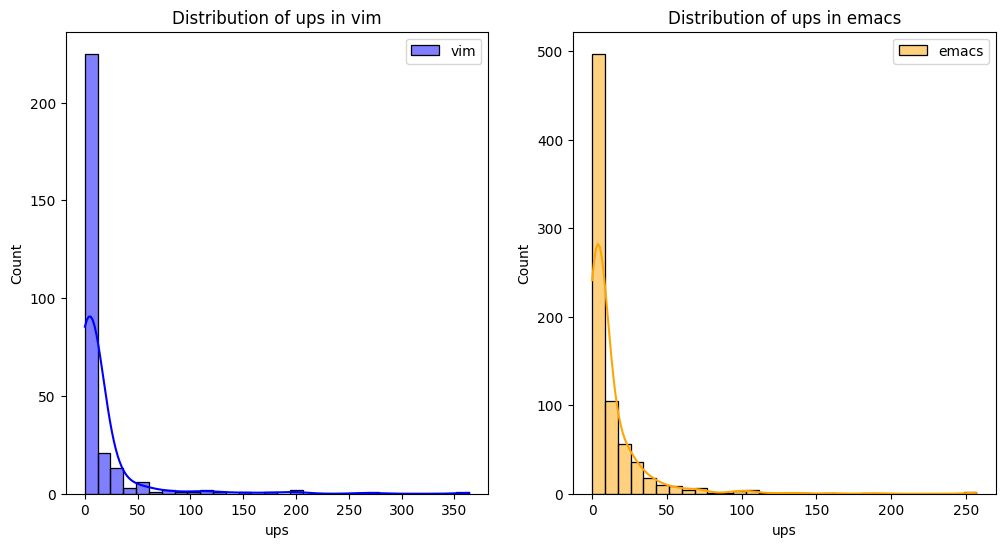

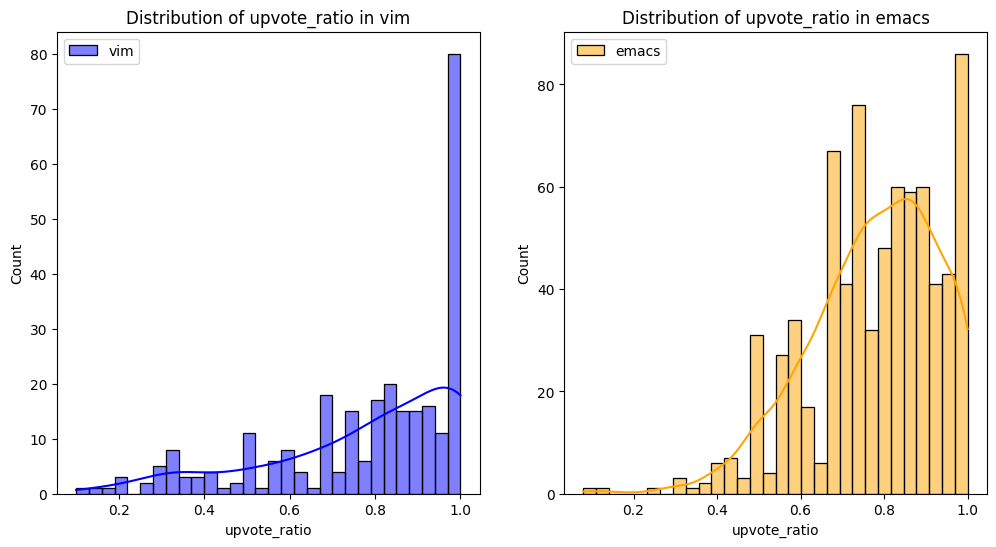

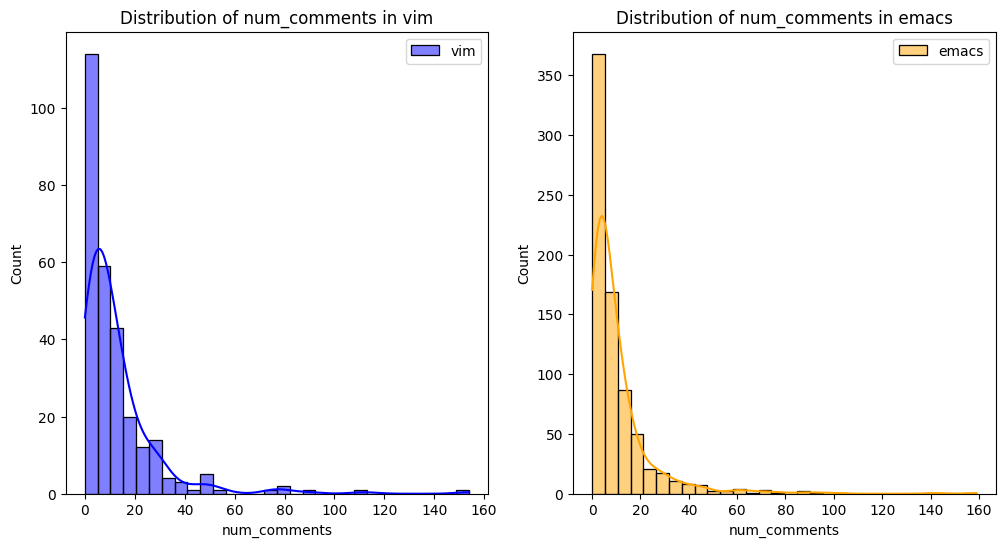

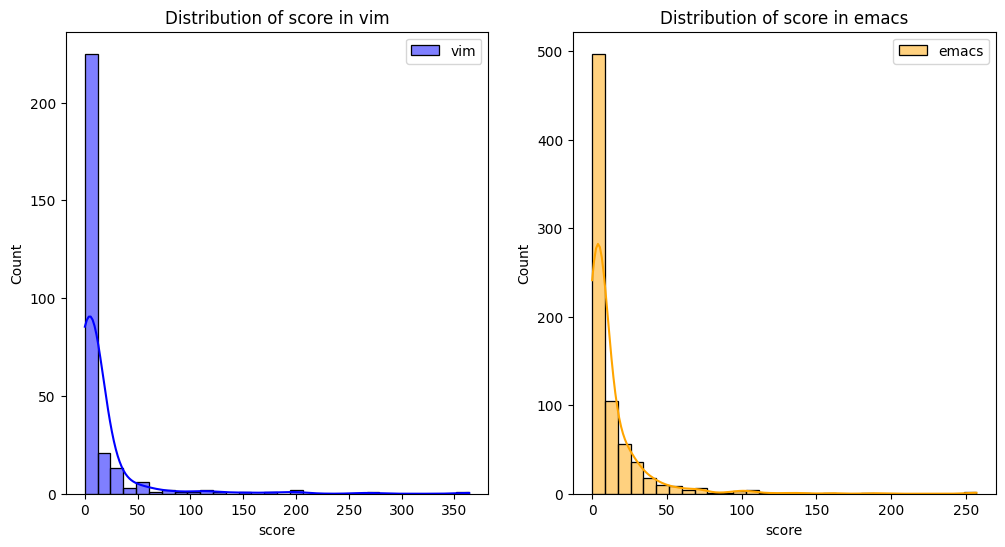

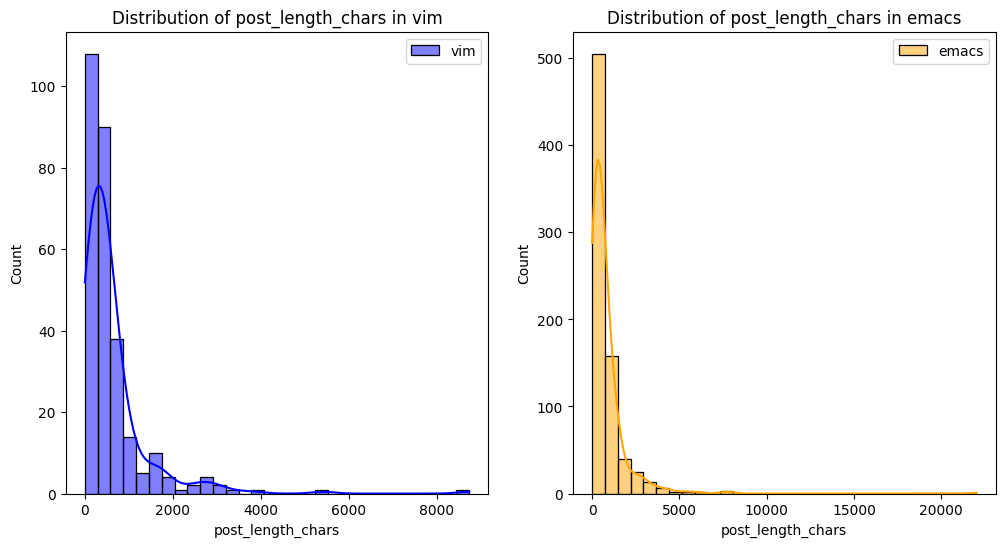

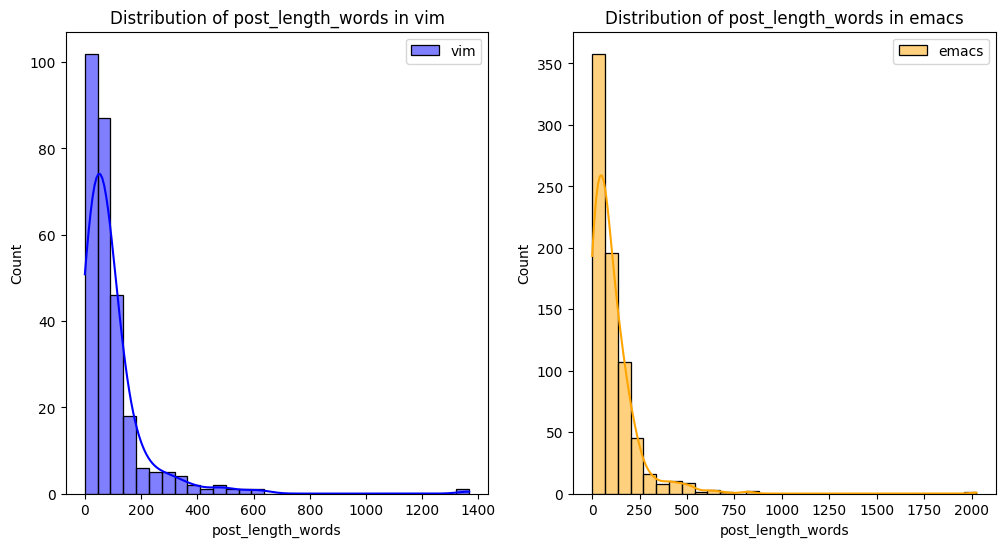

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Generate Plots
def generate_plots(df1, df2, metric):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df1[metric], bins=30, kde=True, color='blue', label='vim')
    plt.title(f'Distribution of {metric} in vim')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.histplot(df2[metric], bins=30, kde=True, color='orange', label='emacs')
    plt.title(f'Distribution of {metric} in emacs')
    plt.legend()

    plt.show()

# Plot for each metric
metrics = ['ups',  'upvote_ratio', 'num_comments', 'score','post_length_chars','post_length_words']
for metric in metrics:
    generate_plots(vim, emacs, metric)


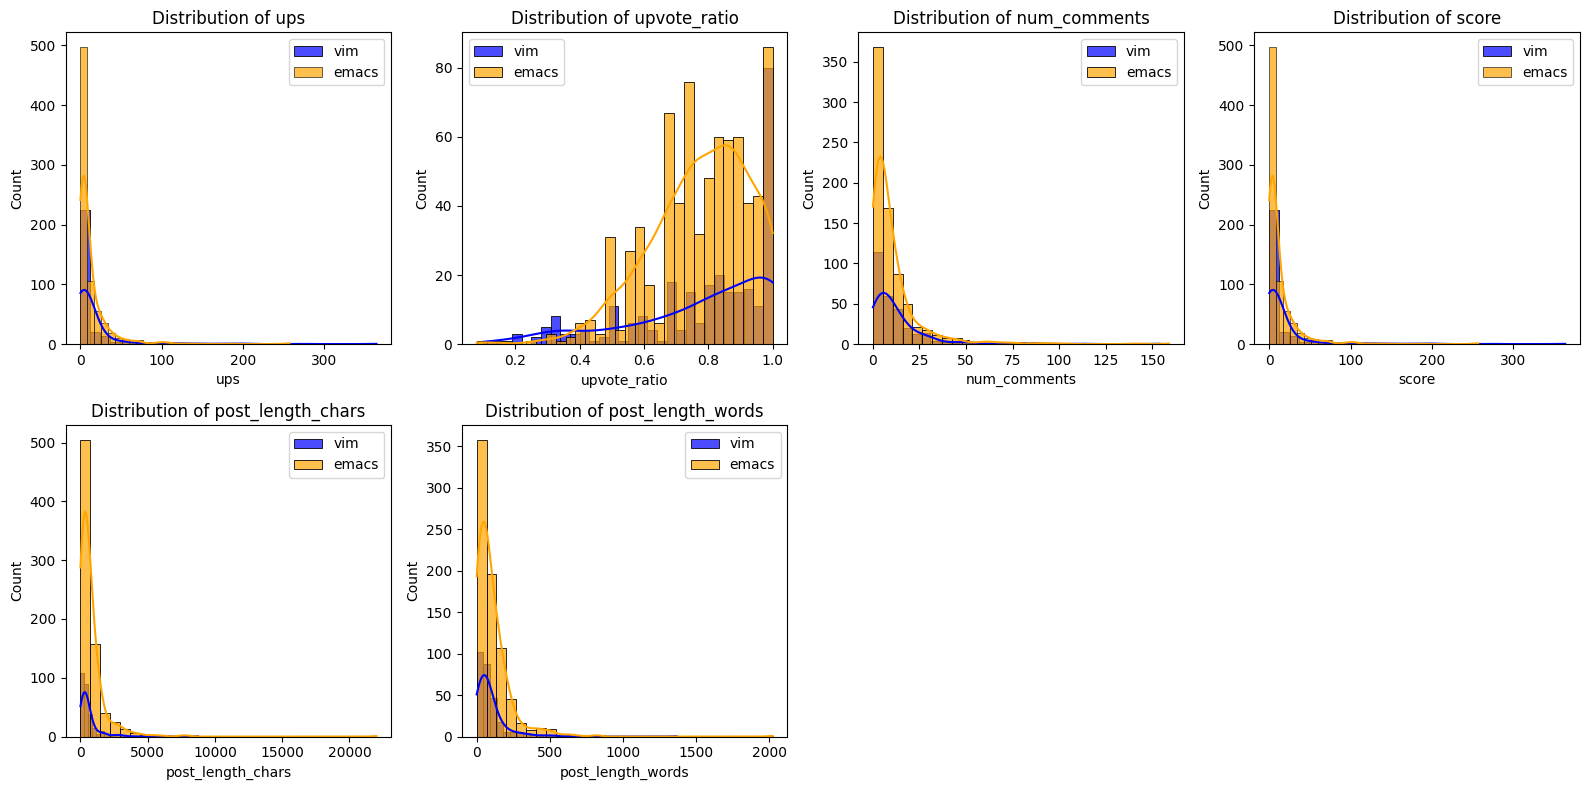

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Generate Plots
def generate_plots(df1, df2, metrics):
    plt.figure(figsize=(16, 8))

    for i, metric in enumerate(metrics, start=1):
        plt.subplot(2, 4, i)
        sns.histplot(df1[metric], bins=30, kde=True, color='blue', label='vim', alpha=0.7)
        sns.histplot(df2[metric], bins=30, kde=True, color='orange', label='emacs', alpha=0.7)
        plt.title(f'Distribution of {metric}')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for each metric
metrics = ['ups', 'upvote_ratio', 'num_comments', 'score', 'post_length_chars', 'post_length_words']
generate_plots(vim, emacs, metrics)


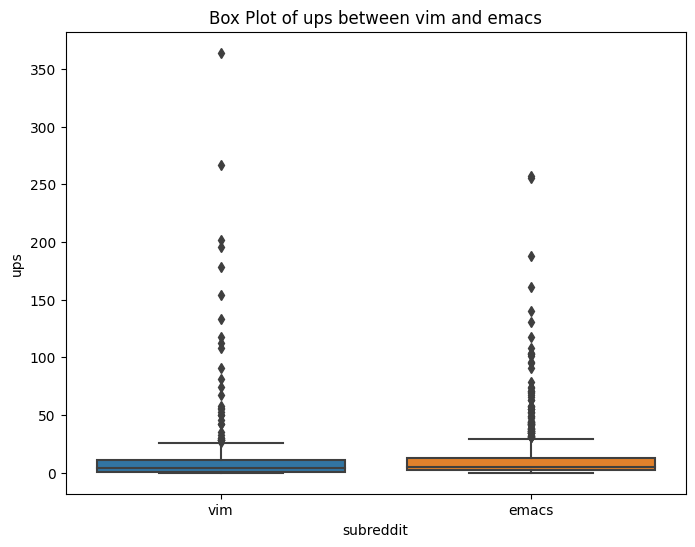

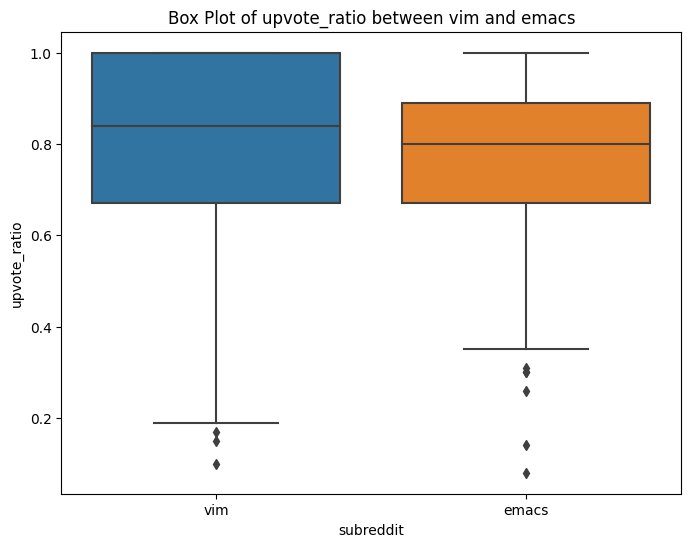

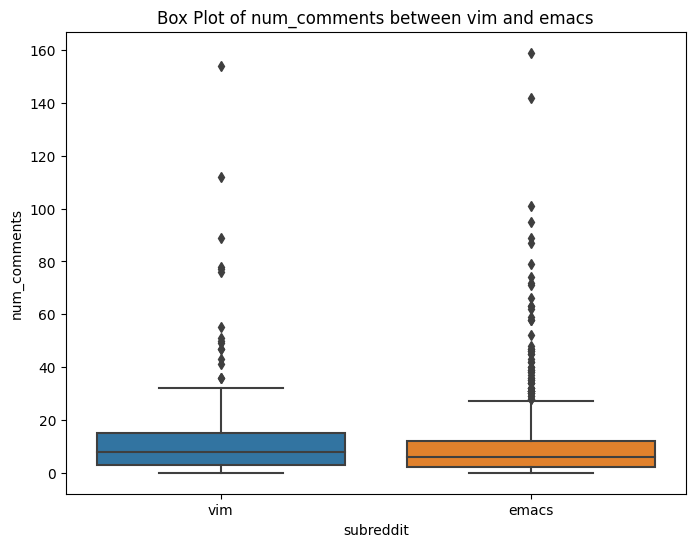

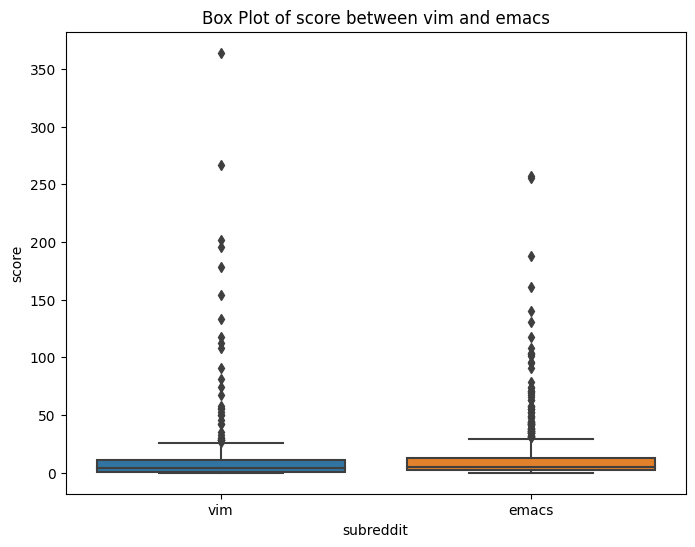

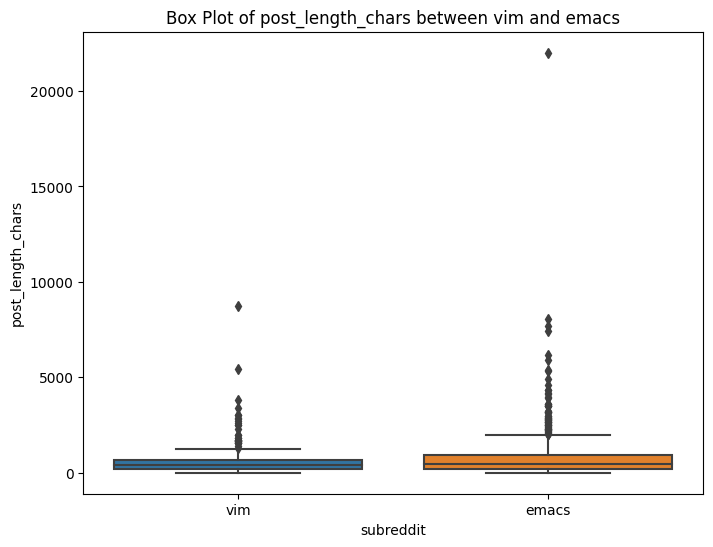

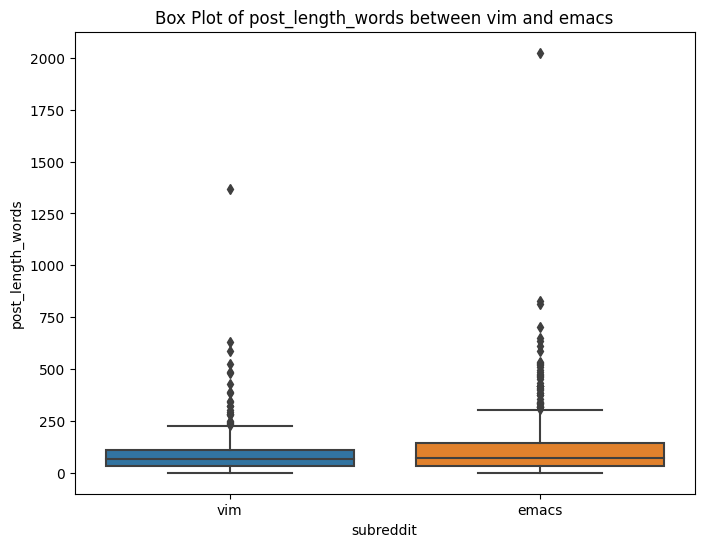

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

# Box plots for each metric
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='subreddit', y=metric, data=pd.concat([vim.assign(subreddit='vim'), emacs.assign(subreddit='emacs')]))
    plt.title(f'Box Plot of {metric} between vim and emacs')
    plt.show()



Average post length (characters) in vim: 597.69
Average post length (characters) in emacs: 777.35
Average post length (words) in vim: 92.52
Average post length (words) in emacs: 105.51


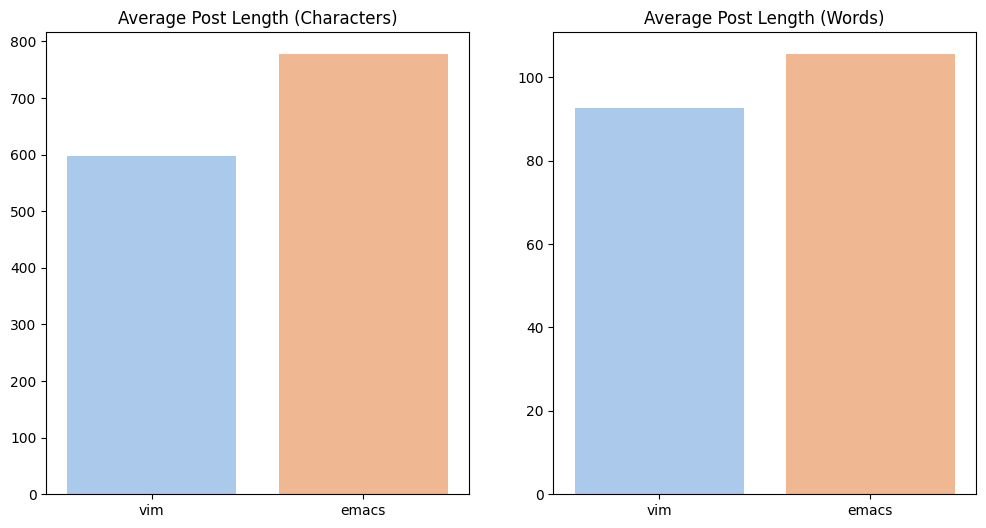

In [12]:
# Task 2: Additional Analysis - Average Post Lengths
avg_chars_vim = vim['post_length_chars'].mean()
avg_chars_emacs = emacs['post_length_chars'].mean()

avg_words_vim = vim['post_length_words'].mean()
avg_words_emacs = emacs['post_length_words'].mean()

print(f"Average post length (characters) in vim: {avg_chars_vim:.2f}")
print(f"Average post length (characters) in emacs: {avg_chars_emacs:.2f}")
print(f"Average post length (words) in vim: {avg_words_vim:.2f}")
print(f"Average post length (words) in emacs: {avg_words_emacs:.2f}")

# Plotting average post lengths
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=['vim', 'emacs'], y=[avg_chars_vim, avg_chars_emacs], palette='pastel')
plt.title('Average Post Length (Characters)')

plt.subplot(1, 2, 2)
sns.barplot(x=['vim', 'emacs'], y=[avg_words_vim, avg_words_emacs], palette='pastel')
plt.title('Average Post Length (Words)')

plt.show()


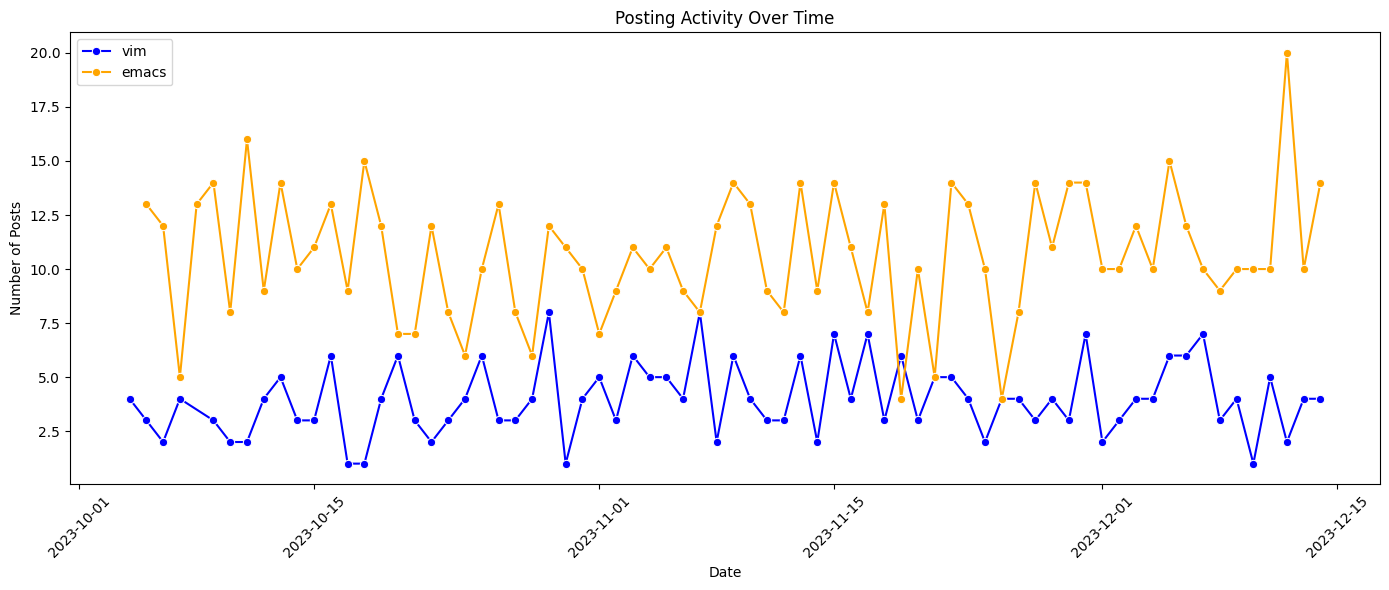

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'created_utc' is in datetime format, if not, convert it using pd.to_datetime
vim['created_utc'] = pd.to_datetime(vim['created_utc']).dt.tz_localize(None)  # Remove time zone info
emacs['created_utc'] = pd.to_datetime(emacs['created_utc']).dt.tz_localize(None)  # Remove time zone info

# Task: Time Series Analysis
def time_series_analysis(df1, df2, start_date, end_date):
    # Filter posts within the specified date range
    df1_filtered = df1[(df1['created_utc'] >= start_date) & (df1['created_utc'] <= end_date)]
    df2_filtered = df2[(df2['created_utc'] >= start_date) & (df2['created_utc'] <= end_date)]

    # Group by date and count the number of posts
    df1_grouped = df1_filtered.groupby(df1_filtered['created_utc'].dt.date).size().reset_index(name='count')
    df2_grouped = df2_filtered.groupby(df2_filtered['created_utc'].dt.date).size().reset_index(name='count')

    # Plotting
    plt.figure(figsize=(14, 6))

    sns.lineplot(x=df1_grouped['created_utc'], y=df1_grouped['count'], label='vim', marker='o', color='blue')
    sns.lineplot(x=df2_grouped['created_utc'], y=df2_grouped['count'], label='emacs', marker='o', color='orange')

    plt.title('Posting Activity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Perform time series analysis
time_series_analysis(vim, emacs, start_date, end_date)


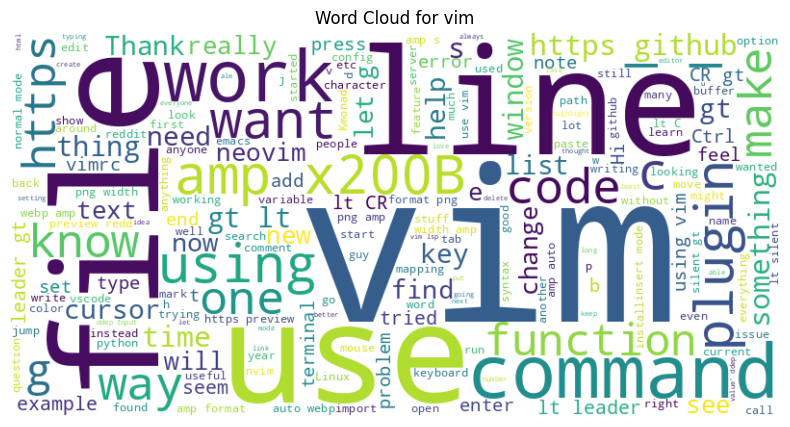

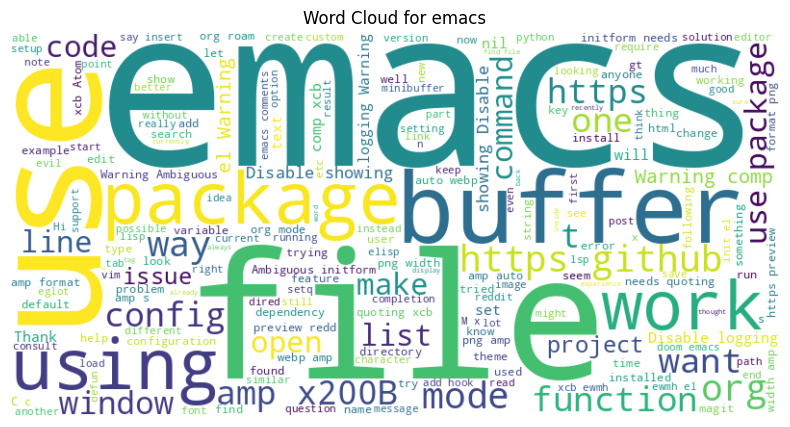

In [14]:
from wordcloud import WordCloud

def generate_word_cloud(df, subreddit_name):
    text = ' '.join(df['selftext'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {subreddit_name}')
    plt.show()

# Generate word clouds for both subreddits
generate_word_cloud(vim, 'vim')
generate_word_cloud(emacs, 'emacs')


<ipython-input-15-2d52bfbeaf12>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vim['sentiment'], label='vim', shade=True)
<ipython-input-15-2d52bfbeaf12>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emacs['sentiment'], label='emacs', shade=True)


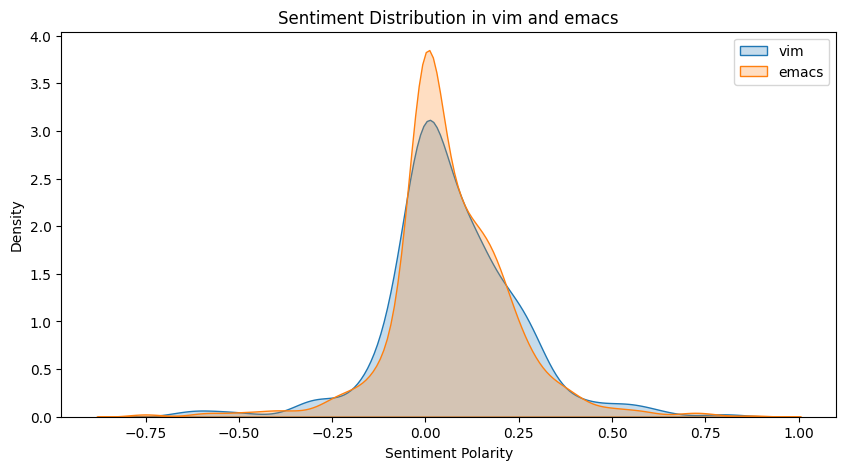

In [15]:
from textblob import TextBlob

# Assuming 'selftext' contains the post text
vim['sentiment'] = vim['selftext'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
emacs['sentiment'] = emacs['selftext'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plotting sentiment distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(vim['sentiment'], label='vim', shade=True)
sns.kdeplot(emacs['sentiment'], label='emacs', shade=True)
plt.title('Sentiment Distribution in vim and emacs')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Density')
plt.legend()
plt.show()
